<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
# TODO:
# 1. use data for which expver=1
# 2. update histogram with raw values, not means
# 3. prepare DataLoader for temperature variable

Goal: to load ERA5 data, currently in netCDF (.nc) format, into a PyTorch DataLoader. 

In [75]:
import os
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import skew, kurtosis
from statsmodels.tsa.seasonal import STL
from datetime import datetime

In [65]:
nc1 = nc.Dataset("/home/lucia/projects/FORMES/rainfall-pde-ml/data/ERA5/adaptor.mars.internal-1694561758.005058-21556-12-0ac6d6fe-cd78-40da-b101-c492099ec0aa.nc")
nc2 = nc.Dataset("/home/lucia/projects/FORMES/rainfall-pde-ml/data/ERA5/adaptor.mars.internal-1694615551.8129032-10691-7-c8fec31b-dab0-47ee-8c05-95d6f3af1e3d.nc")

In [86]:
nc1.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (23,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (30,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'expver': <class 'netCDF4._netCDF4.Variable'>
 int32 expver(expver)
     long_name: expver
 unlimited dimensions: 
 current shape = (2,)
 filling on, default _FillValue of -2147483647 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: 
 current shape = (18532,)
 filling on, default _FillValue of -2147483647 used,
 'u10': <class 'netCDF4._netCDF4.Variable'>
 int16 u10(time, expver, lat

In [87]:
nc2.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (23,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (30,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: 
 current shape = (16072,)
 filling on, default _FillValue of -2147483647 used,
 'u10': <class 'netCDF4._netCDF4.Variable'>
 int16 u10(time, latitude, longitude)
     scale_factor: 0.0002745214570653347
     add_offset: 1.308939674324339
     _FillValue: -32767
     missing_value: -32767
     units: m s**-1
     long_name: 10 metre U wind co

In [69]:
print(np.min(nc1.variables["time"][:]))
print(np.min(nc2.variables["time"][:]))

973008
876576


In [70]:
nc2.variables["time"][:].shape

(16072,)

In [83]:
np.max(precip)

0.03614330291748047

In [10]:
precip = nc.variables["tp"][:]

In [12]:
precip.shape

(18532, 2, 30, 23)

In [19]:
a = precip[:, 0, :, :].shape

In [20]:
b = precip[:, 1, :, :].shape

In [22]:
np.array_equal(a,b)

True

In [23]:
precip = precip[:,0,:,:]

In [49]:
np.ma.count_masked(precip)

189060

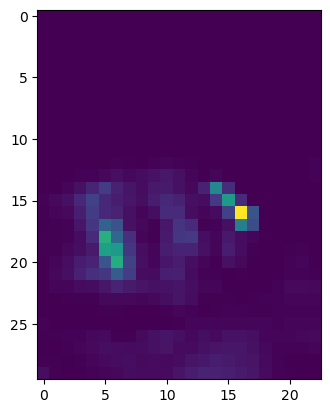

In [81]:
plt.imshow(precip[1000,:,:])

In [58]:
# Reshape the data to have a single dimension
reshaped_precip = precip.reshape(18532, -1) # Flattening the last two dimensions

# Convert from meters to cm of precipitation
reshaped_precip = reshaped_precip*100

# Calculate statistical measures
mean_values = np.mean(reshaped_precip, axis=1)
median_values = np.median(reshaped_precip, axis=1)
std_deviation = np.std(reshaped_precip, axis=1)
variance = std_deviation ** 2
skewness = skew(reshaped_precip, axis=1)
kurt = kurtosis(reshaped_precip, axis=1)
print(mean_values, median_values, std_deviation, variance, skewness, kurt)

/home/lucia/anaconda3/envs/ml-pde/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/lucia/anaconda3/envs/ml-pde/lib/python3.9/site-packages/numpy/lib/shape_base.py:402: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))


[5.59521445363857e-07 0.0001981505234165247 0.00010383119399663446 ... --
 -- --] [-3.469446951953614e-16 -3.469446951953614e-16 -3.469446951953614e-16 ...
 -- -- --] [6.273996924826184e-06 0.000998221286230663 0.0006437059339187546 ... --
 -- --] [3.936303741272841e-11 9.964457362839991e-07 4.14357329362216e-07 ... --
 -- --] [12.5304141   6.41405273  9.2129985  ...         nan         nan
         nan] [174.22801881  45.49891836 103.10995792 ...          nan          nan
          nan]


(array([[30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [27.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.],
        [27.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [30.,  0.,  0.,  0.,  0.,  0.,  

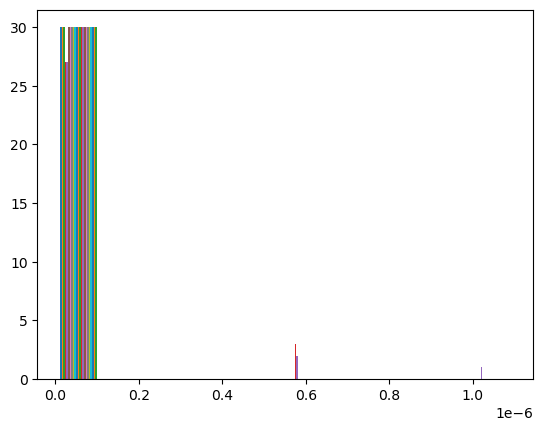

In [85]:
plt.hist(precip[0])

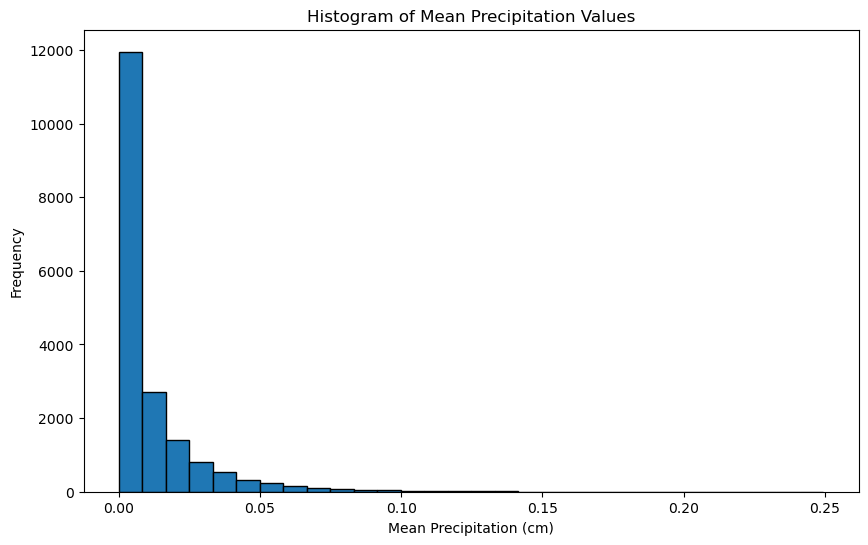

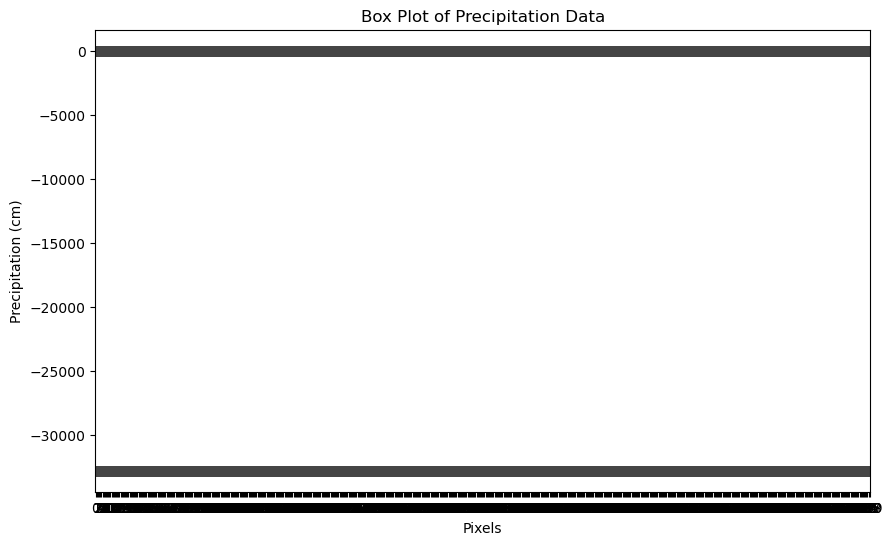

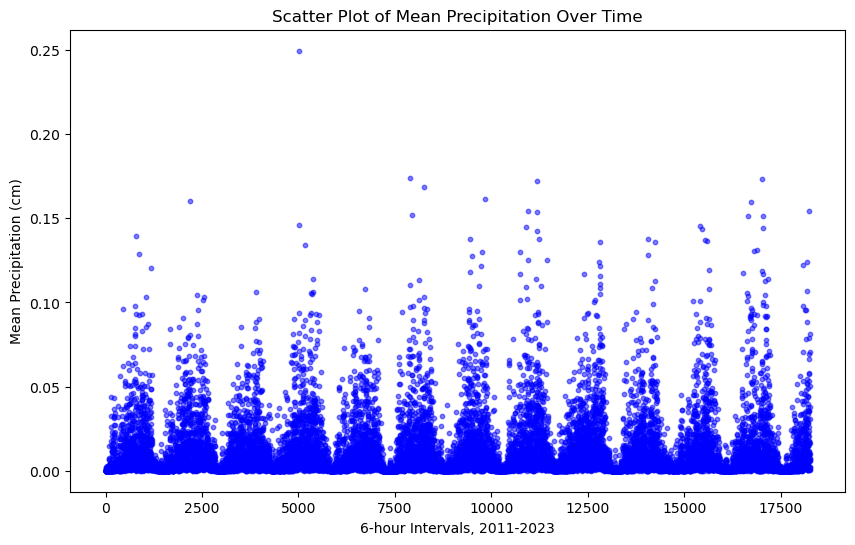

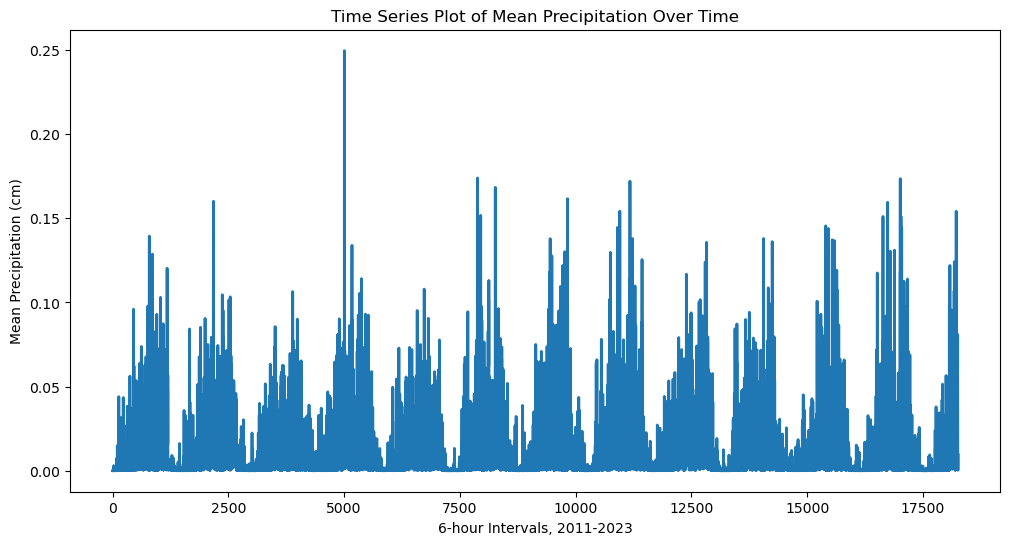

In [59]:
#Create histograms, box plots, scatter plots, and time series plots to visualize the distribution, relationships, and trends in your data.

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(mean_values, bins=30, edgecolor='black')
plt.title('Histogram of Mean Precipitation Values')
plt.xlabel('Mean Precipitation (cm)')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('Histogram of Mean Rainfall Values.png')

# Create Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=reshaped_precip)
plt.title('Box Plot of Precipitation Data')
plt.xlabel('Pixels')
plt.ylabel('Precipitation (cm)')
plt.show()
#plt.savefig('Box Plot of Rainfall Data.png')

# Create Scatter Plot
plt.figure(figsize=(10, 6))
x = np.arange(18532)  # time
y = mean_values
plt.scatter(x, y, s=10, c='blue', alpha=0.5)
plt.title('Scatter Plot of Mean Precipitation Over Time')
plt.xlabel('6-hour Intervals, 2011-2023')
plt.ylabel('Mean Precipitation (cm)')
plt.show()
#plt.savefig('Scatter Plot of Mean Rainfall Over Time.png')

# Create Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(mean_values, linewidth=2)
plt.title('Time Series Plot of Mean Precipitation Over Time')
plt.xlabel('6-hour Intervals, 2011-2023')
plt.ylabel('Mean Precipitation (cm)')
plt.show()
#plt.savefig('Time Series Plot of Mean Rainfall Over Time.png')

(12787080,)


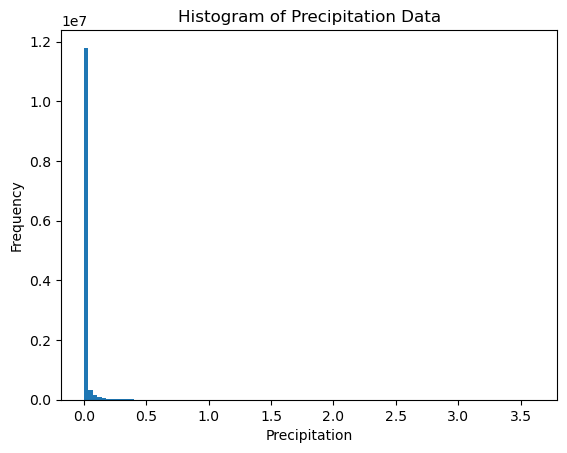

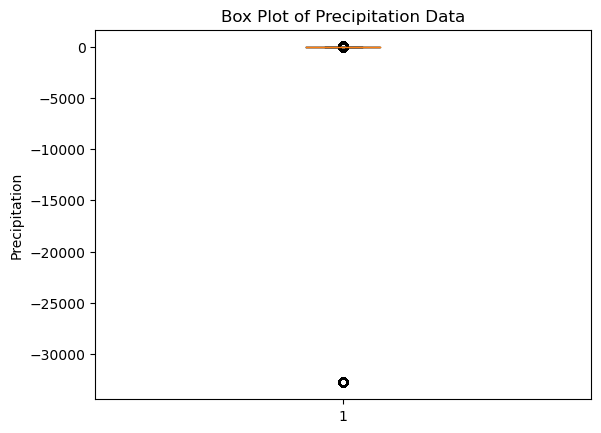

(387695,)


/home/lucia/anaconda3/envs/ml-pde/lib/python3.9/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


(2298018,)


In [80]:
# Outlier detection
flattened_data = precip.reshape(-1) * 100
print(flattened_data.shape)
plt.hist(flattened_data, bins=100)
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Data')
plt.show()

# Create a box plot
plt.boxplot(flattened_data)
plt.ylabel('Precipitation')
plt.title('Box Plot of Precipitation Data')
plt.show()

z_scores = np.abs(stats.zscore(flattened_data))
threshold = 3  # Adjust as needed
outliers = flattened_data[np.where(z_scores > threshold)]
print(outliers.shape)
Q1 = np.percentile(flattened_data, 25)
Q3 = np.percentile(flattened_data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = flattened_data[(flattened_data < lower_bound) | (flattened_data > upper_bound)]
print(outliers.shape)